In [1]:
# @title Clone GitHub repository, install dependencies and check PyTorch and GPU.
!git clone https://github.com/ultralytics/yolov5  # clone
%cd yolov5
!pip install -qr requirements.txt  # install

import torch
import utils
display = utils.notebook_init()  # checks

YOLOv5 🚀 v7.0-399-g8cc44963 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)


Setup complete ✅ (2 CPUs, 12.7 GB RAM, 41.1/112.6 GB disk)


In [2]:
# @title Export to ONNX models (classification)
!python export.py --weights yolov5n-cls.pt --include onnx --imgsz 224 224 --simplify
#!python export.py --weights yolov5s-cls.pt --include onnx --imgsz 224 224 --simplify
#!python export.py --weights yolov5m-cls.pt --include onnx --imgsz 224 224 --simplify

export: data=data/coco128.yaml, weights=['yolov5n-cls.pt'], imgsz=[224, 224], batch_size=1, device=cpu, half=False, inplace=False, keras=False, optimize=False, int8=False, per_tensor=False, dynamic=False, cache=, simplify=True, mlmodel=False, opset=17, verbose=False, workspace=4, nms=False, agnostic_nms=False, topk_per_class=100, topk_all=100, iou_thres=0.45, conf_thres=0.25, include=['onnx']
YOLOv5 🚀 v7.0-399-g8cc44963 Python-3.11.11 torch-2.6.0+cu124 CPU

100% 4.87M/4.87M [00:00<00:00, 298MB/s]

Fusing layers... 
Model summary: 117 layers, 2489464 parameters, 0 gradients, 3.9 GFLOPs

PyTorch: starting from yolov5n-cls.pt with output shape (1, 1000) (4.9 MB)
requirements: Ultralytics requirement ['onnx>=1.12.0'] not found, attempting AutoUpdate...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 275.8 MB/s eta 0:00:00

requirements: AutoUpdate success ✅ 4.8s, installed 1 package: ['onnx>=1.12.0']
requirements: ⚠️ Restart runtime or rerun command for updates to take effect


ON

classify/predict: weights=['yolov5n-cls.onnx'], source=data/images, data=data/coco128.yaml, imgsz=[224, 224], device=, view_img=False, save_txt=False, nosave=False, augment=False, visualize=False, update=False, project=runs/predict-cls, name=exp, exist_ok=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-399-g8cc44963 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)

Loading yolov5n-cls.onnx for ONNX Runtime inference...
requirements: Ultralytics requirement ['onnxruntime-gpu'] not found, attempting AutoUpdate...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 280.8/280.8 MB 113.6 MB/s eta 0:00:00

requirements: AutoUpdate success ✅ 10.5s, installed 1 package: ['onnxruntime-gpu']
requirements: ⚠️ Restart runtime or rerun command for updates to take effect

image 1/2 /content/yolov5/data/images/bus.jpg: 224x224 minibus 0.46, police van 0.16, jeep 0.03, pulled rickshaw 0.03, amphibious vehicle 0.02, 2.6ms
image 2/2 /content/yolov5/data/images/zidane.jpg: 224x224 rugby ball

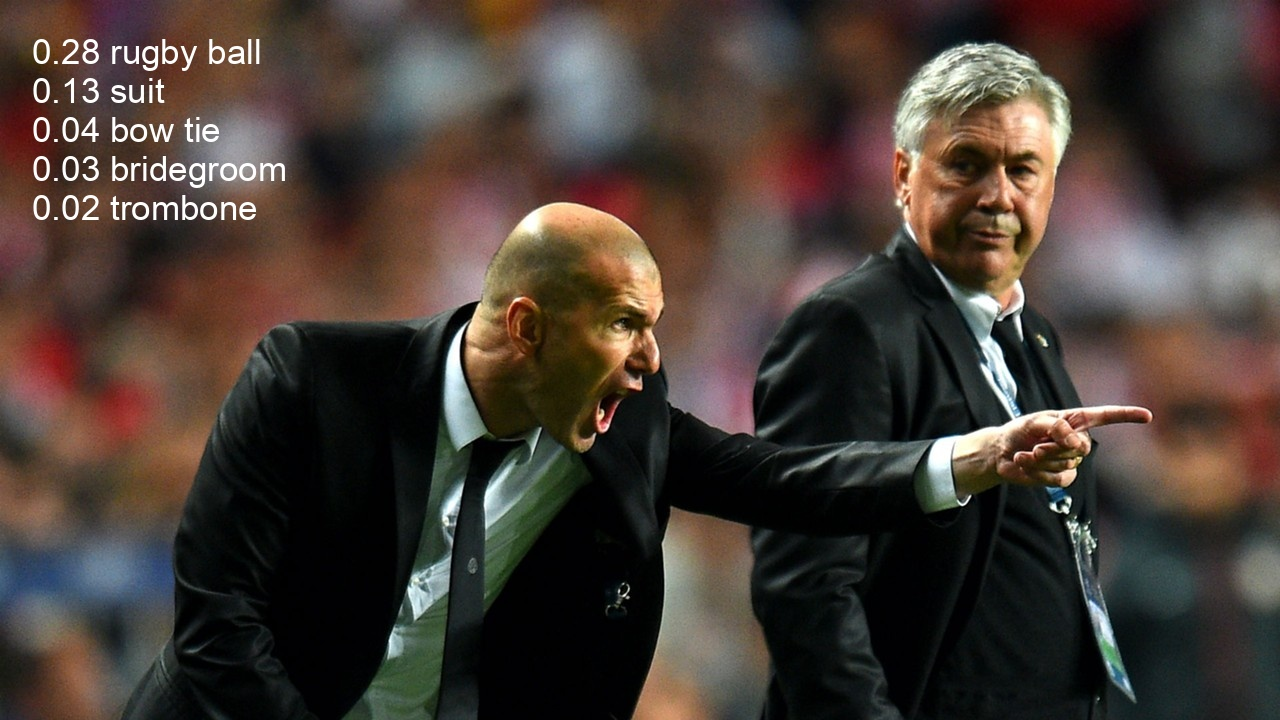

In [3]:
# @title ONNXRuntime Demo
!python classify/predict.py --weights yolov5n-cls.onnx --img 224 --source data/images
display.Image(filename='runs/predict-cls/exp/zidane.jpg', width=600)